In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.shape

(13320, 9)

In [6]:
df = df.drop(['area_type', 'availability', 'society', 'balcony'], axis=1)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df = df.dropna()
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df.shape

(13246, 5)

In [92]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df = df.drop(['size'], axis=1)
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [94]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df[~df['total_sqft'].apply(isFloat)].head(10)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [18]:
def convert_sqft_to_num(x):
    token = x.split('-')
    if(len(token)==2):
        return float(token[0])+float(token[1])/2
    try:
        return float(x)
    except:
        return None

In [19]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [15]:
df.total_sqft[137]

'1042 - 1105'

In [100]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [24]:
df[~df['total_sqft'].apply(isFloat)].shape

(0, 5)

In [25]:
df.location.unique().shape

(1304,)

In [26]:
df.location = df.location.apply(lambda x: x.strip())

In [27]:
location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
type(location_stats)

pandas.core.series.Series

In [29]:
len(location_stats[location_stats<10])

1039

In [30]:
location_less_then_10 = location_stats[location_stats<10]
location_less_then_10

location
Medahalli                             9
Vishwanatha Nagenahalli               9
2nd Phase JP Nagar                    9
Chandra Layout                        9
Chennammana Kere                      9
                                     ..
poornaprajna layout                   1
pavitra paradise                      1
near Ramanashree California resort    1
mvj engineering college               1
1Kasavanhalli                         1
Name: location, Length: 1039, dtype: int64

In [31]:
df['location'] = df['location'].apply(lambda x:'other' if x in location_less_then_10 else x)
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [33]:
df

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5
13316,other,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,488.00,4


In [36]:
df.shape

(12502, 5)

In [35]:
df = df[~(df['total_sqft']/df['bhk']<300)]
df.shape

(12502, 5)

In [39]:
df = df[df['total_sqft'].apply(isFloat)]
df.shape

(12502, 5)

In [60]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [61]:
df.price_per_sqft.describe()

count     12456.000000
mean       6290.299983
std        4175.619211
min         267.829813
25%        4186.725844
50%        5281.690141
75%        6904.652015
max      176470.588235
Name: price_per_sqft, dtype: float64

In [62]:
df.shape

(12502, 6)

In [69]:
df.price_per_sqft.describe()

count     12456.000000
mean       6290.299983
std        4175.619211
min         267.829813
25%        4186.725844
50%        5281.690141
75%        6904.652015
max      176470.588235
Name: price_per_sqft, dtype: float64

In [79]:
high_limit = df.price_per_sqft.mean() + 1*df.price_per_sqft.std()
high_limit

np.float64(10465.919194378203)

In [80]:
df[df.price_per_sqft>=high_limit]

,location,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,3300.0,4.0,600.0,4,18181.818182
11,Whitefield,2785.0,5.0,295.0,4,10592.459605
18,other,2770.0,4.0,290.0,3,10469.314079
22,Thanisandra,2800.0,5.0,380.0,4,13571.428571
48,KR Puram,800.0,1.0,130.0,2,16250.000000
...,...,...,...,...,...,...
13290,Sarjapur Road,4050.0,2.0,450.0,4,11111.111111
13296,Cox Town,1200.0,2.0,140.0,2,11666.666667
13305,Hulimavu,500.0,1.0,220.0,1,44000.000000
13306,other,1200.0,5.0,325.0,4,27083.333333


In [81]:
low_limit = df.price_per_sqft.mean() - 1*df.price_per_sqft.std()
low_limit

np.float64(2114.6807714609868)

In [83]:
df[df.price_per_sqft < low_limit].shape

(48, 6)

In [85]:
df = df[~((df.price_per_sqft >= high_limit) | (df.price_per_sqft <= low_limit))]
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [86]:
df[(df.price_per_sqft >= high_limit) | (df.price_per_sqft <= low_limit)]

,location,total_sqft,bath,price,bhk,price_per_sqft


In [87]:
df.shape

(11328, 6)

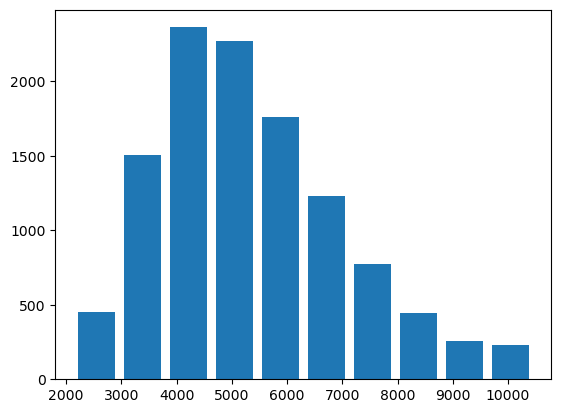

In [88]:
plt.hist(df.price_per_sqft, rwidth=0.8)
plt.show()

In [89]:
df.bath.unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  6.,  7.,  9., 12., 16., 10., 13.])

In [90]:
df[df.bath > df.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
2620,other,11338.0,9.0,1000.0,6,8819.897689
7709,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
11366,Nagasandra,7000.0,8.0,450.0,4,6428.571429
12103,Thanisandra,1806.0,6.0,116.0,3,6423.034330


In [91]:
df.shape

(11328, 6)

In [92]:
df = df[~(df.bath > df.bhk+2)]
df.shape

(11324, 6)

In [93]:
df.sample(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
9318,Choodasandra,1180.0,2.0,71.22,2,6035.593220
11488,Lakshminarayana Pura,1200.0,2.0,80.00,2,6666.666667
4740,Ananth Nagar,870.0,2.0,36.00,2,4137.931034
6155,Bannerghatta Road,1476.0,3.0,125.00,3,8468.834688
6506,other,3800.0,2.0,130.00,3,3421.052632
7048,Attibele,450.0,1.0,12.50,1,2777.777778
7227,Babusapalaya,1410.0,2.0,65.00,3,4609.929078
4614,Varthur,1600.0,4.0,112.00,4,7000.000000
7746,8th Phase JP Nagar,1100.0,2.0,35.00,2,3181.818182
2111,Electronic City,1111.0,3.0,50.00,3,4500.450045


In [95]:
df = df.drop(['price_per_sqft'], axis=1)
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [96]:
df.shape

(11324, 5)

In [97]:
df.describe()

,total_sqft,bath,price,bhk
count,11278.000000,11324.000000,11324.000000,11324.000000
mean,1496.701069,2.461763,84.041876,2.566496
std,863.440009,0.980263,66.601915,0.907685
min,300.000000,1.000000,10.000000,1.000000
25%,1100.000000,2.000000,47.320000,2.000000
50%,1276.500000,2.000000,65.000000,2.000000
75%,1635.000000,3.000000,97.000000,3.000000
max,30400.000000,16.000000,2100.000000,16.000000


In [98]:
dummies = pd.get_dummies(df.location)

In [99]:
df = pd.concat([df, dummies], axis=1)
df.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Electronic City Phase II,1056.0,2.0,39.07,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Chikka Tirupathi,2600.0,5.0,120.00,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Uttarahalli,1440.0,2.0,62.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Lingadheeranahalli,1521.0,3.0,95.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Kothanur,1200.0,2.0,51.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [100]:
df.shape

(11324, 258)

In [101]:
df = df.drop(['location', 'other'], axis=1)
df.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2600.0,5.0,120.00,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1440.0,2.0,62.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1521.0,3.0,95.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1200.0,2.0,51.00,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [102]:
df.shape
df = df.dropna()
df.isnull().sum()

total_sqft             0
bath                   0
price                  0
bhk                    0
1st Block Jayanagar    0
                      ..
Yelachenahalli         0
Yelahanka              0
Yelahanka New Town     0
Yelenahalli            0
Yeshwanthpur           0
Length: 256, dtype: int64

In [103]:
x = df.drop(['price'], axis=1)
y = df.price
x.shape

(11278, 255)

In [104]:
y

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13314    112.00
13315    231.00
13317     60.00
13318    488.00
13319     17.00
Name: price, Length: 11278, dtype: float64

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [106]:
x_train.shape

(9022, 255)

In [107]:
x_test.shape

(2256, 255)

In [108]:
y_train.shape

(9022,)

In [109]:
y_test.shape

(2256,)

In [114]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
            
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    vali

,model,best_score,best_params
0,linear_regression,0.823903,{}
1,lasso,0.795003,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.757521,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [116]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
linear_score = cross_val_score(LinearRegression(), x, y, cv=cv)
linear_score.mean()

np.float64(0.823903114057471)

In [132]:
from sklearn.linear_model import LinearRegression
lrclf = LinearRegression()
lrclf.fit(x_train, y_train)
lrclf.score(x_test, y_test)

0.8489691377431344

In [133]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(x.columns==location)[0][0]
    X = np.zeros(len(x.columns))
    X[0]=sqft
    X[1]=bath
    X[2]=bhk
    if loc_index>=0:
        X[loc_index]=1
    return lrclf.predict([X])[0]

In [134]:
print(predict_price('1st Phase JP Nagar',1000, 2, 2))

84.14770953961214


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [135]:
print(predict_price('Indira Nagar',1000, 2, 2))

95.01641744032861


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
